In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D

In [3]:
np.random.seed(42)
X1 = 2 * np.random.rand(100, 1)
X2 = 3 * np.random.rand(100, 1)
X = np.c_[X1, X2]  # Combine features
y = 4 + 3 * X1 + 2 * X2 + np.random.randn(100, 1)

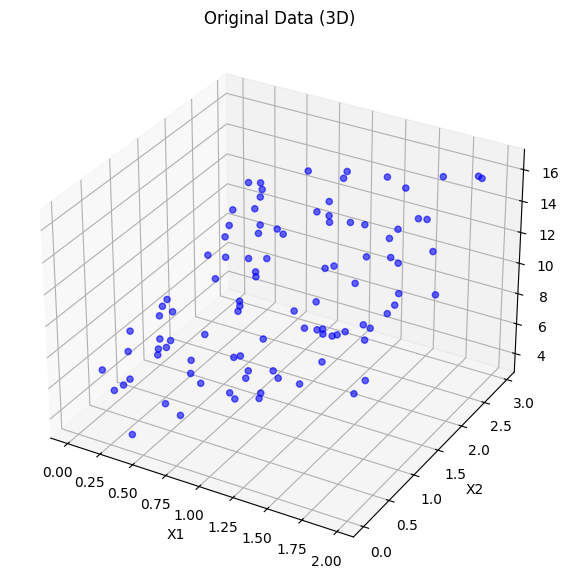

In [4]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, y, c='blue', marker='o', alpha=0.6)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
ax.set_title('Original Data (3D)')
plt.show()

In [5]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [6]:
y_pred = model.predict(X)


In [7]:
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

In [9]:
model.intercept_[0], model.coef_[0][0], model.coef_[0][1], mse, r2

(3.9106100364500715,
 2.8291373394863073,
 2.2397704700335583,
 0.9456718122001475,
 0.8716432637002007)

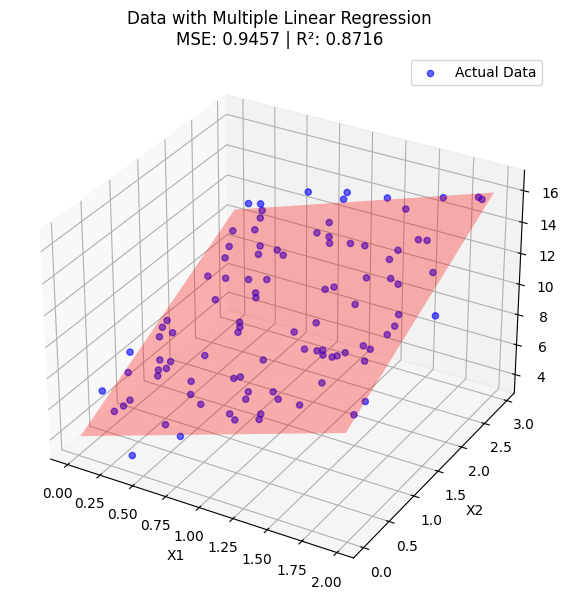

In [14]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, y, c='blue', marker='o', alpha=0.6, label='Actual Data')
x1_range = np.linspace(X1.min(), X1.max(), 10)
x2_range = np.linspace(X2.min(), X2.max(), 10)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)
X_mesh = np.c_[x1_mesh.ravel(), x2_mesh.ravel()]
y_mesh = model.predict(X_mesh).reshape(x1_mesh.shape)
ax.plot_surface(x1_mesh, x2_mesh, y_mesh, alpha=0.3, color='red')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
ax.set_title(f'Data with Multiple Linear Regression\nMSE: {mse:.4f} | R²: {r2:.4f}')
ax.legend()
plt.show()
